# Keyword arguments in python


1. \*\*kwargs
2. kwargs acts like a dictionary


In [1]:
d = {"name": "Utkarsh", "age": 28, "married": True}
type(d)

dict

In [2]:
d

{'name': 'Utkarsh', 'age': 28, 'married': True}

In [3]:
d.keys()

dict_keys(['name', 'age', 'married'])

In [4]:
d.items()

dict_items([('name', 'Utkarsh'), ('age', 28), ('married', True)])

In [5]:
def function(**kwargs):
    print(kwargs)
    print(type(kwargs))
    for key, value in kwargs.items():
        print(f"{key} : {value}")

In [6]:
function(name="Sarthak", age=24)

{'name': 'Sarthak', 'age': 24}
<class 'dict'>
name : Sarthak
age : 24


In [7]:
function(name="Aditi", age=28, email="aditi@example.com", graduated=True)

{'name': 'Aditi', 'age': 28, 'email': 'aditi@example.com', 'graduated': True}
<class 'dict'>
name : Aditi
age : 28
email : aditi@example.com
graduated : True


In [8]:
d

{'name': 'Utkarsh', 'age': 28, 'married': True}

In [9]:
function(**d)

{'name': 'Utkarsh', 'age': 28, 'married': True}
<class 'dict'>
name : Utkarsh
age : 28
married : True


## Practical example for kwargs


### Perform billing for a restauraunt , provided the menu including taxes


In [10]:
menu = {"burger": 150, "pizza": 270, "sandwich": 100, "pasta": 250, "coffee": 50}

In [11]:
menu.get("pasta")

250

In [12]:
a = menu.get("samosa")
print(a)

None


In [21]:
menu.items()

dict_items([('burger', 150), ('pizza', 270), ('sandwich', 100), ('pasta', 250), ('coffee', 50)])

In [13]:
def hotel_bill(**kwargs):
    bill = 0
    for food, qty in kwargs.items():
        price = menu.get(food)
        if price is not None:
            amt = price * qty
            bill = bill + amt
            print(
                f"Food Item : {food}, price : {price:.2f} INR Qty : {qty}, Subtotal : {amt:.2f} INR"
            )
    print(f"Total billing amount is : {bill:.2f} INR")
    return bill

In [14]:
b1 = hotel_bill(burger=2, coffee=1)

Food Item : burger, price : 150.00 INR Qty : 2, Subtotal : 300.00 INR
Food Item : coffee, price : 50.00 INR Qty : 1, Subtotal : 50.00 INR
Total billing amount is : 350.00 INR


In [15]:
b1

350

In [16]:
b2 = hotel_bill(pizza=4, sandwich=2, coffee=6)

Food Item : pizza, price : 270.00 INR Qty : 4, Subtotal : 1080.00 INR
Food Item : sandwich, price : 100.00 INR Qty : 2, Subtotal : 200.00 INR
Food Item : coffee, price : 50.00 INR Qty : 6, Subtotal : 300.00 INR
Total billing amount is : 1580.00 INR


In [17]:
table3 = {"pasta": 3, "sandwich": 2, "burger": 1}

In [18]:
hotel_bill(**table3)

Food Item : pasta, price : 250.00 INR Qty : 3, Subtotal : 750.00 INR
Food Item : sandwich, price : 100.00 INR Qty : 2, Subtotal : 200.00 INR
Food Item : burger, price : 150.00 INR Qty : 1, Subtotal : 150.00 INR
Total billing amount is : 1100.00 INR


1100

# Decorators

1. Any functions is input to a decorator
2. Output is a function - wrapper
3. Purpose of decorator is to modify a function


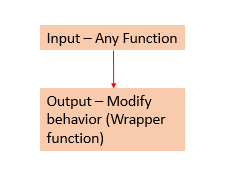


In [14]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print("Welcome user")
        result = func(*args, **kwargs)
        print(f"Result is : {result}")
        print("Thank you")
        return result

    return wrapper

### Using decorator on any function


In [15]:
@welcome
def simple_intrest(P, N, R):
    I = (P * N * R) / 100
    return I

In [16]:
I1 = simple_intrest(10000, 3, 6.5)

Welcome user
Result is : 1950.0
Thank you


In [39]:
I2 = simple_intrest(P=40000, N=3, R=100)

Welcome user
Result is : 120000.0
Thank you


In [17]:
print(I1)

1950.0


In [21]:
@welcome
def hypotenuse(a, b):
    c = (a**2 + b**2) ** (1 / 2)
    return c

In [23]:
c = hypotenuse(3, 4)

Welcome user
Result is : 5.0
Thank you


In [24]:
c

5.0

In [25]:
d = hypotenuse(a=4, b=5)

Welcome user
Result is : 6.4031242374328485
Thank you


### Authenticate a user


In [18]:
users = {"sarthaks1": "Example@123", "aditim3": "More@456", "rahuls": "Passord#789"}

In [26]:
users.get("sarthaks1")

'Example@123'

In [27]:
users["sarthaks1"]

'Example@123'

In [34]:
def authenticate(func):
    def wrapper(username, password, *args, **kwargs):
        if username in users.keys() and password == users.get(username):
            print(f"Login Successfull , Welcome : {username}")
            result = func(username, password, *args, **kwargs)
            print(f"Result : {result}")
            print("Thank you for using this function")
            return result
        else:
            print("Login Unsuccessfull, Username, password not found")

    return wrapper

In [35]:
@authenticate
def compound_intrest(username, password, P, N, R):
    A = P * (1 + R / 100) ** N
    I = A - P
    return I

In [36]:
compound_intrest(username="sarthaks1", password="Example@123", P=50000, N=4, R=7.1)

Login Successfull , Welcome : sarthaks1
Result : 15785.152784049977
Thank you for using this function


15785.152784049977

In [37]:
compound_intrest(username="utkarsh", password="password", P=10000, N=3, R=8.1)

Login Unsuccessfull, Username, password not found


In [38]:
compound_intrest(username="rahuls", password="Incorrect", P=50000, N=6, R=10)

Login Unsuccessfull, Username, password not found


In [40]:
@welcome
@authenticate
def compound_intrest(username, password, P, N, R):
    A = P * (1 + R / 100) ** N
    I = A - P
    return I

In [41]:
compound_intrest(username="sarthaks1", password="Example@123", P=50000, N=4, R=7.1)

Welcome user
Login Successfull , Welcome : sarthaks1
Result : 15785.152784049977
Thank you for using this function
Result is : 15785.152784049977
Thank you


15785.152784049977